In [441]:
import numpy as np
from numpy import r_
from numpy import pi
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view
from utils import Utils

In [442]:
utils = Utils()
samplerate = int(40e6)
freq = int(20e5)

In [443]:
start_binary = np.array([1,1,1,1,1,1,1,0])
real_data = np.random.randint(2, size=8)
binary_data = np.append(start_binary,real_data)
# binary_data = np.append(binary_data, [0])
# binary_data = np.append(start_binary, [1,0,1,0,1,0,1,0])


print(binary_data)

[1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1]


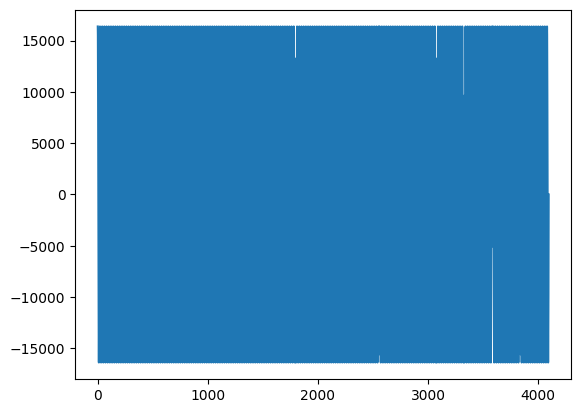

In [444]:
utils.gen_bpsk_carrier_signal(samplerate, freq)
buf = utils.bpsk_modulate(binary_data)
plt.plot(buf)
# utils.bpsk_demodulate(buf, freq, samplerate)

In [445]:
import time

# for i in range(10000):
#     real_data = np.random.randint(2, size=8)
#     binary_data = np.append(start_binary,real_data)
#     buf = utils.bpsk_modulate(binary_data)
#     if(len(buf) != 0):
#         rxed_data = utils.bpsk_demodulate(buf, freq, samplerate)
#         print("{}\n{}\n".format(real_data, rxed_data))



In [446]:
N = 8192

fs = samplerate

fc = freq

ts = 1 / float(fs)

t = np.arange(0, N * ts, ts)

radians = 2 * np.pi * t * fc

i = np.cos(radians) * 2 ** 14

# q = np.sin(2 * np.pi * t * fc) * 2 ** 14
q = np.zeros(N)

carrier_signal = i + 1j * q

In [447]:
def carrier_phase_offset_index(rad):
    val = rad / (2 * np.pi * fc) / ts
    return int(np.round(val))

carrier size = 2048 buf size = 4096
0.15780607320387652
0


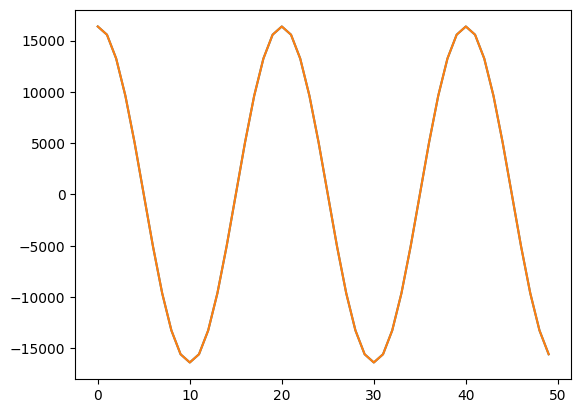

In [448]:
print("carrier size = {} buf size = {}".format(len(carrier_signal[:2048]), len(buf)))
# utils.phase_shift(carrier_signal[:2048].real, buf.real)
# offset = 3

rad = utils.phase_shift(carrier_signal[:len(buf)].real, buf.real)
print(np.degrees(rad))

offset_index = utils.carrier_phase_offset_index(rad, fc, ts)
# offset_index = carrier_phase_offset_index(rad)
print(offset_index)
plt.plot(carrier_signal[offset_index:50+offset_index].real)
plt.plot(buf[:50].real)
# plt.plot(carrier_signal[offset_index: 50 + offset_index])
plt.show()


In [449]:
def percent_error(real, received):
    total_wrong = 0
    for i in range(7):
        if(real[i] != received[i]):
            total_wrong += 1
    
    return ( total_wrong / 7 ) * 100

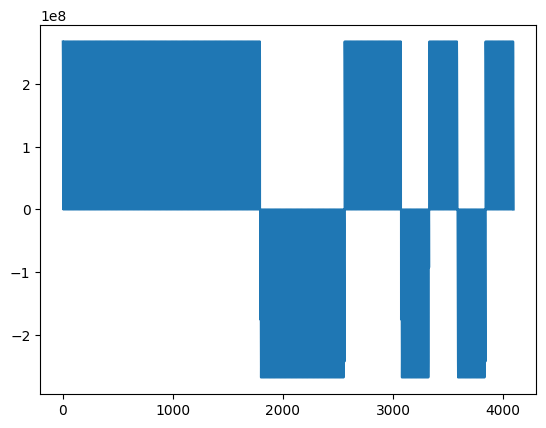

[0 0 1 1 0 1 0 1]
[0 0 1 1 0 1 0 1]


In [450]:
samples_per_symbol = 256

phase_shift_rad = utils.phase_shift(carrier_signal[:len(buf)].real, buf.real)
offset = carrier_phase_offset_index(phase_shift_rad)
offset = 0
other_signal = buf * carrier_signal[offset:len(buf)+offset]

if(np.sum(other_signal[samples_per_symbol:samples_per_symbol*5]) < 0):
    other_signal *= -1

plt.plot(other_signal)
plt.show()

x_hat = sliding_window_view(other_signal[256:], window_shape=samples_per_symbol)

x = np.sum(x_hat, axis=1)

symbols = x[::samples_per_symbol]

bits = ~(symbols < 0)
 
realbits = bits.astype(int)

i = 2
while(realbits[i] == 1):
    i+=1
realbits = realbits[i+1:]


print("{}\n{}".format(real_data, realbits))
